# MLP - Classificação de sobrevivência no Titanic

**Grupo: Juan Felipe Serafim dos Santos (jfss) e Rodrigo Rossiter Guimarães Filho (rrgf)**

## Objetivo

Este é um mini-projeto focado na implementação e experimentação de uma rede neural do tipo Multilayer Perceptron (MLP) para a classificação da sobrevivência de passageiros do Titanic. O objetivo principal é aplicar técnicas de aprendizado de máquina para prever se uma pessoa sobreviveria ou não ao desastre do Titanic com base em atributos como idade, sexo, classe da cabine, etc.

## Projeto

### Conectando o google colab ao drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importando bibliotecas e dados

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay,roc_curve
from matplotlib import rcParams

rcParams['figure.figsize'] = 10, 8

### Importando os dados e tratando eles



In [ ]:
# Importando os dados presentes no drive
df = pd.read_csv('/content/drive/MyDrive/SI/MLP/train.csv')


# Descartando colunas irrelevantes
df.drop(columns=['Name', 'PassengerId'], inplace=True)


#Considerando o NaN relacionado a coluna da cabine como a pessoa que estava fora da cabine
df['Cabin'].fillna('Out',inplace=True)


#Removendo linhas NaN referente a idade
df.dropna(inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    object 
 7   Fare      712 non-null    float64
 8   Cabin     712 non-null    object 
 9   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB
None


### Estrutura dos dados

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,Out,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Out,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,Out,S


### Separando features e target

<ipython-input-5-e6321542beb1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cbar=True, annot=True, square=True, cmap='coolwarm')


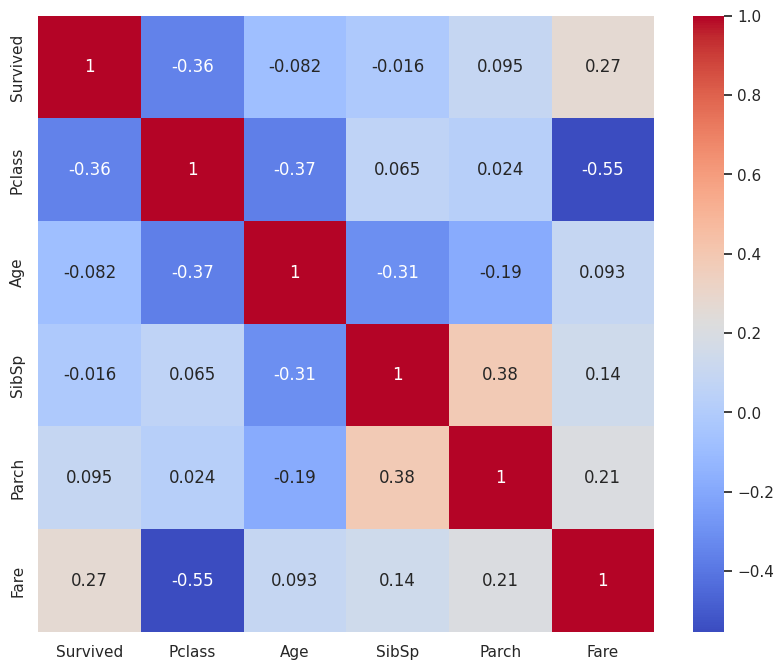

In [ ]:
#Verificação de correlação entre colunas
sns.set(font_scale=1)
sns.heatmap(df.corr(), cbar=True, annot=True, square=True, cmap='coolwarm')

#Separação das features e target
X = df.drop(columns=['Survived'])
y = df['Survived']

De acordo com a informação de correlação entre as colunas da tabela, existe uma correlação mediana entre a classe social e o preço da passagem, o que era de se esperar e que não é tão alto a ponto de atrapalhar o treinamento dos modelos.

### Dividindo o conjunto de teste e treinamento

In [ ]:
# Codificar variáveis categóricas em variáveis binárias
X_encoded = pd.get_dummies(X)

# Divisão do conjunto
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=1)

### Normalizando os dados

In [ ]:
# Padronizando os dados de treinamento usando o StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Criação e treinamentos do modelos

In [ ]:
# Criação dos modelos MLP
clf1 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=False,  random_state=21,tol=0.000000001)

clf2 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='lbfgs', verbose=True,  random_state=21,tol=0.000000001)

clf3 = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=700, alpha=0.0001,
                     solver='sgd', verbose=False,  random_state=21,tol=0.000000001)

clf4 = MLPClassifier(hidden_layer_sizes=(300), max_iter=500, alpha=0.0001,
                     solver='lbfgs', verbose=True,  random_state=21,tol=0.000000001)

clf5 = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='adam', verbose=False,  random_state=21,tol=0.000000001)


# Treinamento dos modelos
clf1.fit(X_train_scaled, y_train)

clf2.fit(X_train_scaled, y_train)

clf3.fit(X_train_scaled, y_train)

clf4.fit(X_train_scaled, y_train)

clf5.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500, random_state=21,
              tol=1e-09)

### Previsão e avaliação do modelo

In [ ]:
# Realizando as previsões
y_pred1 = clf1.predict(X_test_scaled)
y_pred2 = clf2.predict(X_test_scaled)
y_pred3 = clf3.predict(X_test_scaled)
y_pred4 = clf4.predict(X_test_scaled)
y_pred5 = clf5.predict(X_test_scaled)

y_pred_geral=[y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]

# Apresentando o relatório de classificação
class_report1 = classification_report(y_test, y_pred1, digits=4)
class_report2 = classification_report(y_test, y_pred2, digits=4)
class_report3 = classification_report(y_test, y_pred3, digits=4)
class_report4 = classification_report(y_test, y_pred4, digits=4)
class_report5 = classification_report(y_test, y_pred5, digits=4)
print(class_report1)
print(class_report2)
print(class_report3)
print(class_report4)
print(class_report5)



              precision    recall  f1-score   support

           0     0.8200    0.8039    0.8119       102
           1     0.7436    0.7632    0.7532        76

    accuracy                         0.7865       178
   macro avg     0.7818    0.7835    0.7826       178
weighted avg     0.7874    0.7865    0.7868       178

              precision    recall  f1-score   support

           0     0.8557    0.8137    0.8342       102
           1     0.7654    0.8158    0.7898        76

    accuracy                         0.8146       178
   macro avg     0.8106    0.8148    0.8120       178
weighted avg     0.8171    0.8146    0.8152       178

              precision    recall  f1-score   support

           0     0.8000    0.8235    0.8116       102
           1     0.7534    0.7237    0.7383        76

    accuracy                         0.7809       178
   macro avg     0.7767    0.7736    0.7749       178
weighted avg     0.7801    0.7809    0.7803       178

              preci

### Matrizes de confusão

In [ ]:
def plot_confusion_matrix(cm1,ax):
  group_names = ['True Dead', 'False Alive', 'False Dead', 'True Alive']
  group_counts = ["{0:0.0f}".format(value) for value in cm1.flatten()]
  group_percentages = ["{0:.1%}".format(value) for value in cm1.flatten() / np.sum(cm1)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(2, 2)
  sns.set(font_scale=1)
  sns.heatmap(cm1, annot=labels, fmt='', cmap='coolwarm',ax=ax)

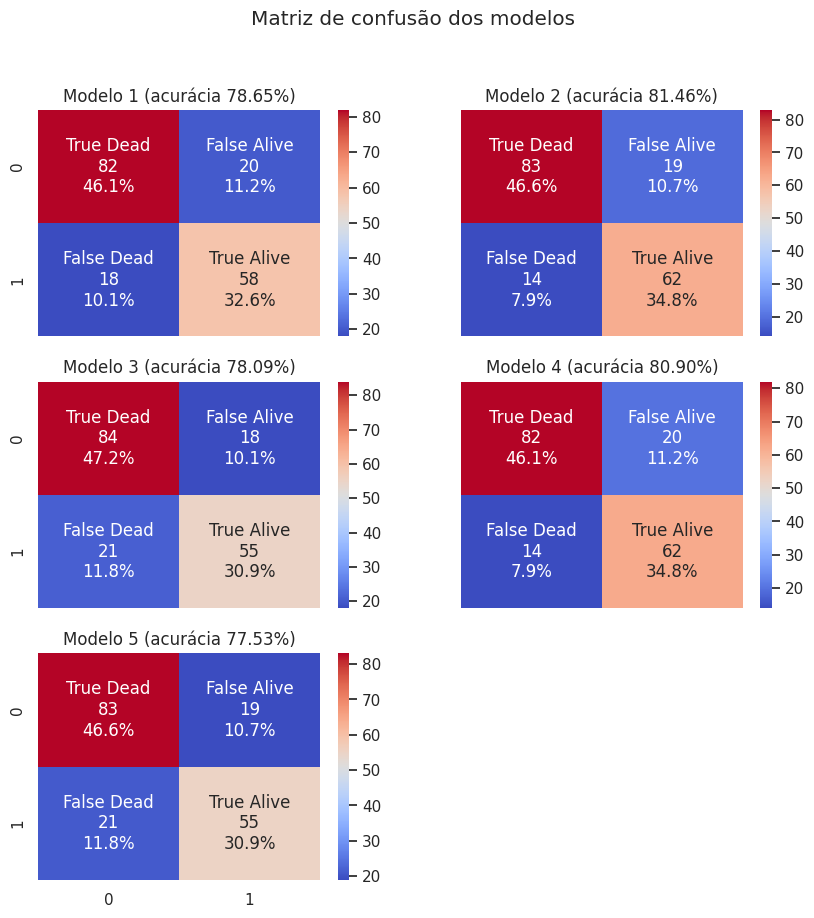

In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3= confusion_matrix(y_test, y_pred3)
cm4 = confusion_matrix(y_test, y_pred4)
cm5 = confusion_matrix(y_test, y_pred5)
conf_matrix=[cm1,cm2,cm3,cm4,cm5]

fig, axes = plt.subplots(3, 2 , sharex=True,sharey=True, figsize=(10,10))
fig.suptitle('Matriz de confusão dos modelos')
axes[0,0].set_title('Modelo 1 (acurácia {0:.2%})'.format(accuracy_score(y_test, y_pred1)))
axes[0,1].set_title('Modelo 2 (acurácia {0:.2%})'.format(accuracy_score(y_test, y_pred2)))
axes[1,0].set_title('Modelo 3 (acurácia {0:.2%})'.format(accuracy_score(y_test, y_pred3)))
axes[1,1].set_title('Modelo 4 (acurácia {0:.2%})'.format(accuracy_score(y_test, y_pred4)))
axes[2,0].set_title('Modelo 5 (acurácia {0:.2%})'.format(accuracy_score(y_test, y_pred5)))
for i in range(3):
  for j in range(2):
    if 2*i+j<5:
      plot_confusion_matrix(conf_matrix[2*i+j],ax=axes[i,j])
    if i==2 and j>0:
      axes[i,j].set_visible(False)


### Curvas ROC

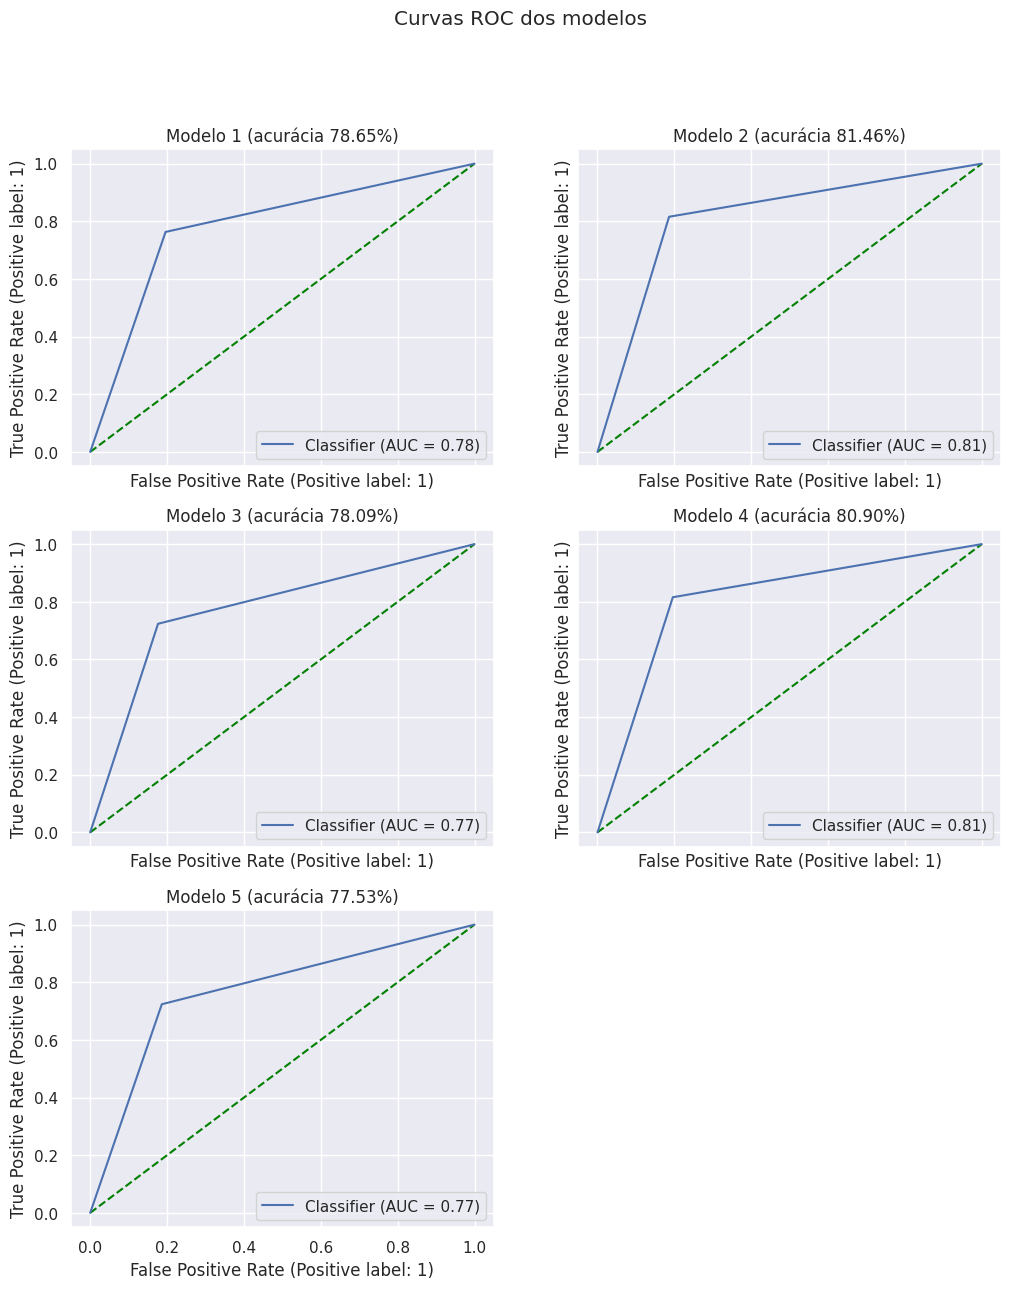

In [ ]:
#Preparação para visualização de cada gráfico
fig, axes = plt.subplots(3, 2 , sharex=True,sharey=True, figsize=(12,14))
fig.suptitle('Curvas ROC dos modelos')
axes[0,0].set_title('Modelo 1 (acurácia {0:.2%})'.format(accuracy_score(y_test, y_pred_geral[0])))
axes[0,0].plot([0, 1], [0, 1], color='green', linestyle='--')

axes[0,1].set_title('Modelo 2 (acurácia {0:.2%})'.format(accuracy_score(y_test, y_pred_geral[1])))
axes[0,1].plot([0, 1], [0, 1], color='green', linestyle='--')

axes[1,0].set_title('Modelo 3 (acurácia {0:.2%})'.format(accuracy_score(y_test, y_pred_geral[2])))
axes[1,0].plot([0, 1], [0, 1], color='green', linestyle='--')

axes[1,1].set_title('Modelo 4 (acurácia {0:.2%})'.format(accuracy_score(y_test, y_pred_geral[3])))
axes[1,1].plot([0, 1], [0, 1], color='green', linestyle='--')

axes[2,0].set_title('Modelo 5 (acurácia {0:.2%})'.format(accuracy_score(y_test, y_pred_geral[4])))
axes[2,0].plot([0, 1], [0, 1], color='green', linestyle='--')

#Plotagem
for i in range(3):
  for j in range(2):
    if 2*i+j<5:
      RocCurveDisplay.from_predictions(y_test,y_pred_geral[2*i+j],ax=axes[i,j])
    if i==2 and j>0:
      axes[i,j].set_visible(False)


###Função de perdas (loss graph)

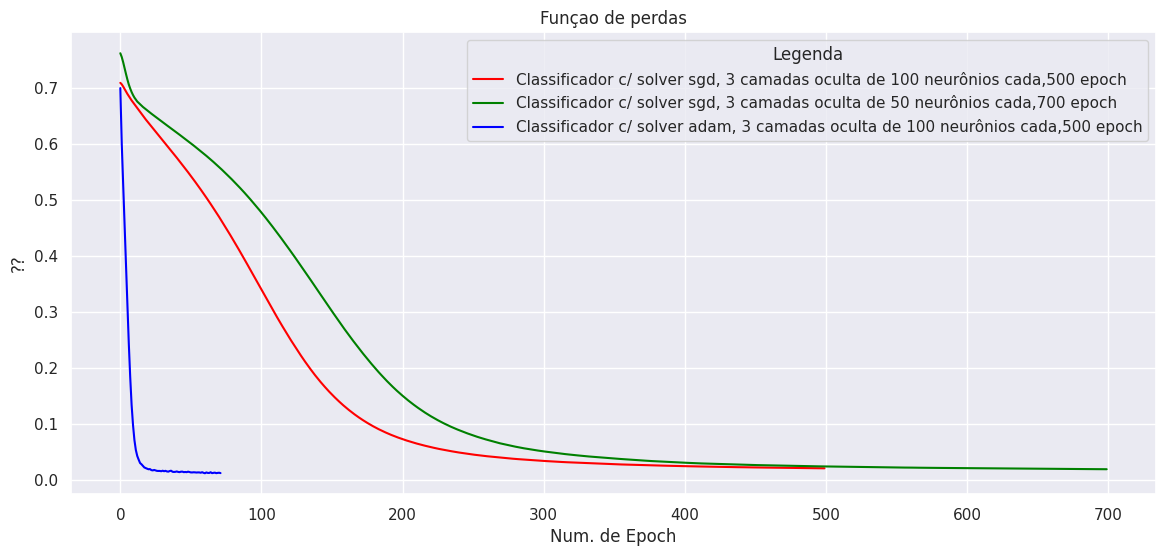

In [ ]:
plt.figure(figsize=(14,6))
plt.title("Funçao de perdas")
plt.xlabel("Num. de Epoch")
plt.ylabel("??")
plt.plot(clf1.loss_curve_,color='red',  label='Classificador c/ solver sgd, 3 camadas oculta de 100 neurônios cada,500 epoch')
plt.plot(clf3.loss_curve_,color='green' , label='Classificador c/ solver sgd, 3 camadas oculta de 50 neurônios cada,700 epoch')
plt.plot(clf5.loss_curve_,color='blue' ,label='Classificador c/ solver adam, 3 camadas oculta de 100 neurônios cada,500 epoch')
plt.legend(title='Legenda')

Em relação aos outros modelos com o otimizador lbfgs, não é possível de ser apresentado a função de perdas dele, devido a algum motivo que não encontrei e não tenho domínio (acredito que a forma de convergência que ele utiliza para treinar o modelo).
